In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models , layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt

2021-10-10 12:44:19.687554: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
TRAIN_PATH = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train'
VAL_PATH = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid'
INPUT_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 18345 files belonging to 10 classes.


2021-10-10 12:44:38.659276: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-10 12:44:38.663124: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-10 12:44:38.709460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-10 12:44:38.710443: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-10 12:44:38.710496: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-10 12:44:38.744695: I tensorflow/stream_executor/platform/def

In [4]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    VAL_PATH,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4585 files belonging to 10 classes.


In [5]:
class_names = train_dataset.class_names
class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
10


In [6]:
train_dataset = train_dataset.prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size = tf.data.AUTOTUNE)

In [7]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [8]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [9]:
input_shape = (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')  
])

model.build(input_shape = input_shape)

In [10]:
model.compile(
optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 32)         

In [12]:
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_dataset
)

Epoch 1/50


2021-10-10 12:44:44.605714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-10 12:44:44.617189: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2021-10-10 12:44:44.844504: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-10 12:44:46.134095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-10 12:44:46.677304: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


574/574 [==============================] - 155s 253ms/step - loss: 1.9662 - accuracy: 0.2502 - val_loss: 1.3330 - val_accuracy: 0.5243
Epoch 2/50
574/574 [==============================] - 50s 86ms/step - loss: 1.1293 - accuracy: 0.5848 - val_loss: 1.3264 - val_accuracy: 0.5631
Epoch 3/50
574/574 [==============================] - 50s 87ms/step - loss: 0.8007 - accuracy: 0.7150 - val_loss: 1.9687 - val_accuracy: 0.5154
Epoch 4/50
574/574 [==============================] - 50s 86ms/step - loss: 0.6578 - accuracy: 0.7654 - val_loss: 0.6638 - val_accuracy: 0.7662
Epoch 5/50
574/574 [==============================] - 51s 88ms/step - loss: 0.4908 - accuracy: 0.8204 - val_loss: 0.5848 - val_accuracy: 0.7954
Epoch 6/50
574/574 [==============================] - 50s 87ms/step - loss: 0.4466 - accuracy: 0.8438 - val_loss: 0.4017 - val_accuracy: 0.8552
Epoch 7/50
574/574 [==============================] - 50s 86ms/step - loss: 0.3963 - accuracy: 0.8593 - val_loss: 0.5760 - val_accuracy: 0.7954
E

In [13]:
scores = model.evaluate(train_dataset)

574/574 [==============================] - 35s 61ms/step - loss: 0.2219 - accuracy: 0.9294


In [14]:
scores = model.evaluate(val_dataset)

144/144 [==============================] - 9s 58ms/step - loss: 0.2410 - accuracy: 0.9254


In [15]:
history.history

{'loss': [1.6704444885253906,
  0.9880430698394775,
  0.7329427003860474,
  0.5807021260261536,
  0.46390315890312195,
  0.4152560532093048,
  0.3713633418083191,
  0.34149280190467834,
  0.3128453493118286,
  0.28785812854766846,
  0.2581345736980438,
  0.24110202491283417,
  0.22921065986156464,
  0.23230984807014465,
  0.21688368916511536,
  0.21567891538143158,
  0.1866113841533661,
  0.19597278535366058,
  0.16596519947052002,
  0.16586294770240784,
  0.16021476686000824,
  0.15239156782627106,
  0.15304015576839447,
  0.14652419090270996,
  0.146863654255867,
  0.13393288850784302,
  0.13141487538814545,
  0.13969649374485016,
  0.12598362565040588,
  0.1288597732782364,
  0.11231420189142227,
  0.1306992769241333,
  0.11955243349075317,
  0.11336538195610046,
  0.10668787360191345,
  0.10090293735265732,
  0.11274472624063492,
  0.09875033050775528,
  0.1043473407626152,
  0.10968077182769775,
  0.09161897003650665,
  0.10170096158981323,
  0.08565818518400192,
  0.0905153527855

In [16]:
np.min(history.history['loss'])

0.07978670299053192

In [17]:
np.min(history.history['val_loss'])

0.11230923980474472

In [18]:
np.max(history.history['accuracy'])

0.9741619229316711

In [19]:
np.max(history.history['val_accuracy'])

0.9633587598800659

In [20]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 574}

In [21]:
accur = history.history['accuracy']
val_accur = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

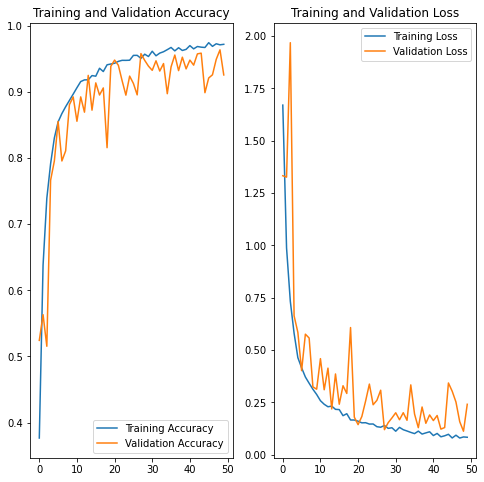

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accur , label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_accur , label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss , label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss , label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image to predict
Image Actual Label :  Tomato___Tomato_mosaic_virus
Image Predicted Label :  Tomato___Tomato_mosaic_virus


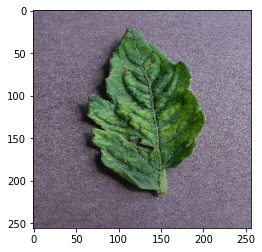

In [23]:
import numpy as np

for image_batch , label_batch in val_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First Image to predict")
    plt.imshow(first_image)
    print("Image Actual Label : ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Image Predicted Label : ", class_names[np.argmax(batch_prediction[0])] )

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class , confidence

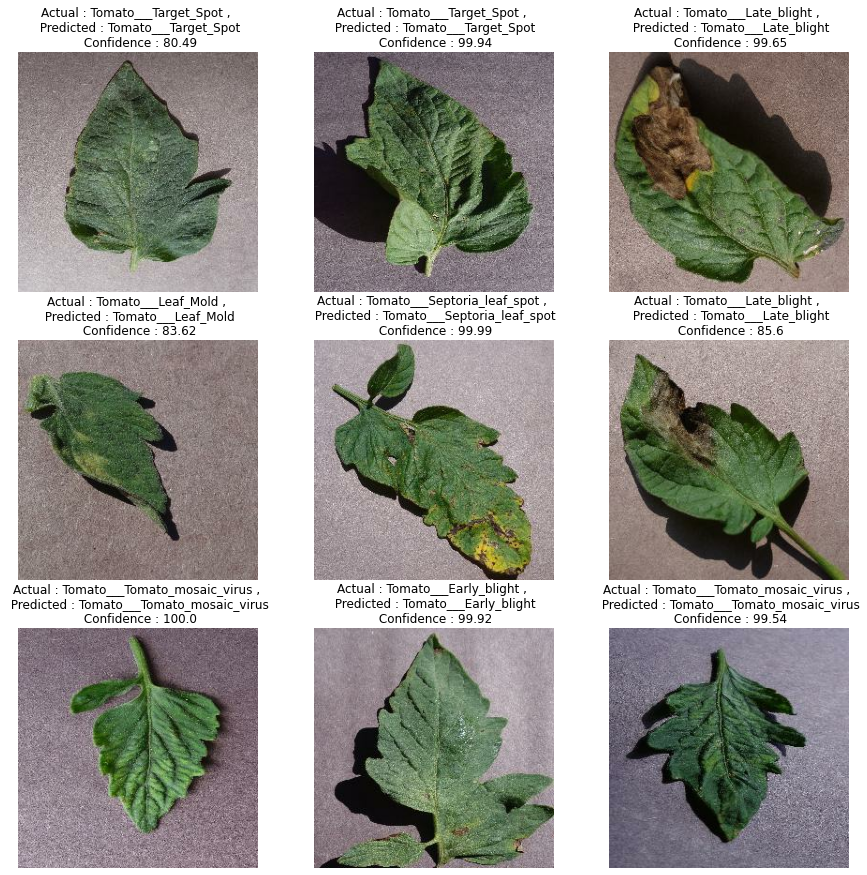

In [25]:
plt.figure(figsize=(15,15))
for images, labels in val_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3 , 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual : {actual_class} , \n Predicted : {predicted_class}\n Confidence : {confidence}')
        plt.axis('off')

In [26]:
model.save('/kaggle/working/1')

2021-10-10 13:33:24.850711: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
